### This datset indicates the water consumption in the Austin Area. 
The dataset can be found at
https://data.austintexas.gov/Utilities-and-City-Services/Austin-Water-Residential-Water-Consumption/sxk7-7k6z <br>
The following Hypothesis needs to be validated <br>
1) Water consumption is High during summer months (June - Aug/Sep)<br>

The following insights need to be derived.<br>
1) How does consumption by Customer class vary<br>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib notebook
from time import strptime,strftime

In [13]:
data=pd.read_csv("Austin_Water_-_Residential_Water_Consumption.csv")
data.head()

,Year Month,Postal Code,Customer Class,Total Gallons
0,201201,78613,Multi-Family,23000
1,201201,78613,Irrigation - Multi-Family,11000
2,201201,78617,Multi-Family,2477000
3,201201,78617,Residential,19962500
4,201201,78652,Irrigation - Residential,38500


In [14]:
# Check the shape, column names, info and summary
print("Number of Rows %d\n" % data.shape[0])
print("Number of Columns %d\n" % data.shape[1])
print("List of Columns names %s\n" % data.columns)
print("Information %s\n" % data.info())
print("Description %s\n" % data.describe())

Number of Rows 11132

Number of Columns 4

List of Columns names Index([u'Year Month', u'Postal Code', u'Customer Class', u'Total Gallons'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11132 entries, 0 to 11131
Data columns (total 4 columns):
Year Month        11132 non-null int64
Postal Code       11132 non-null int64
Customer Class    11132 non-null object
Total Gallons     11132 non-null int64
dtypes: int64(3), object(1)
memory usage: 391.4+ KB
Information None

Description           Year Month   Postal Code  Total Gallons
count   11132.000000  11132.000000   1.113200e+04
mean   201452.913403  78726.312343   1.245802e+07
std       170.045011     31.575193   1.917752e+07
min    201201.000000  78613.000000   0.000000e+00
25%    201306.000000  78721.000000   1.576000e+05
50%    201412.000000  78731.000000   2.790200e+06
75%    201605.000000  78748.000000   1.726955e+07
max    204406.000000  78759.000000   1.255698e+08



In [15]:
#Convert the 'Year Month' column to date type and make it the index.
#data.index=pd.to_datetime(data['Year Month'].apply(lambda x: datetime.strptime(str(x),"%Y%m")))
data['Year Month']=data['Year Month'].apply(lambda x: datetime.strptime(str(x),"%Y%m"))
data=data.set_index(['Year Month'])
#Delete the columns 'Year Month'
#del data['Year Month']
#del data['Customer Class']

In [16]:
#Check to see the change in Index.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11132 entries, 2012-01-01 to 2044-06-01
Data columns (total 3 columns):
Postal Code       11132 non-null int64
Customer Class    11132 non-null object
Total Gallons     11132 non-null int64
dtypes: int64(2), object(1)
memory usage: 304.4+ KB


In [17]:
#We notice an the max date of 2044-06-01. This date is in the future and seems to be an anamoly. 
#Let us check
print(data.index.value_counts())
# Bingo!! This is defintely an outlier. It only has one value. Let us drop it
data=data.drop(data.index[-1])

Year Month
2017-08-01    167
2017-09-01    167
2017-06-01    166
2017-07-01    166
2017-01-01    165
2017-03-01    165
2017-04-01    165
2016-12-01    165
2016-10-01    165
2016-11-01    165
2017-05-01    165
2017-02-01    165
2016-05-01    163
2016-04-01    163
2016-02-01    163
2016-01-01    162
2015-12-01    162
2016-09-01    162
2016-06-01    162
2016-07-01    162
2016-03-01    162
2016-08-01    162
2015-05-01    161
2015-08-01    161
2015-11-01    161
2015-10-01    161
2015-09-01    161
2015-03-01    161
2015-04-01    161
2015-07-01    161
             ... 
2013-11-01    157
2013-07-01    156
2014-06-01    156
2013-08-01    156
2014-07-01    156
2014-09-01    156
2014-08-01    156
2014-05-01    156
2012-01-01    156
2014-04-01    156
2013-09-01    156
2012-07-01    155
2013-05-01    155
2012-12-01    155
2012-05-01    155
2013-01-01    155
2012-11-01    155
2013-02-01    155
2012-10-01    155
2012-04-01    155
2013-06-01    155
2012-08-01    155
2012-09-01    155
2013-04-01    155

In [18]:
datatmp=data.pivot_table(index=data.index,columns="Customer Class",values="Total Gallons",aggfunc=sum)

<IPython.core.display.Javascript object>


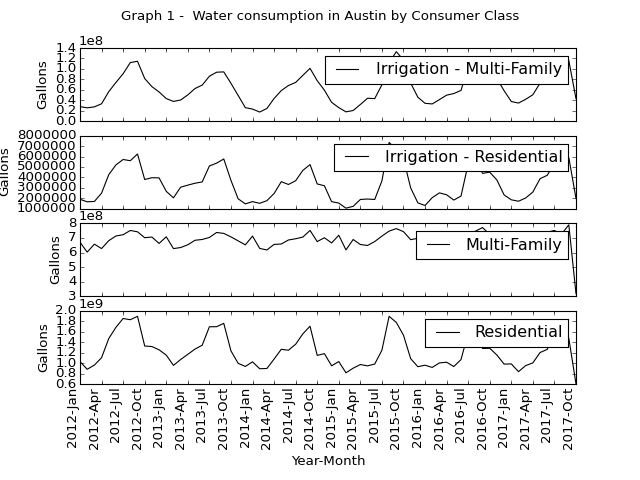

In [19]:
ax=datatmp.plot(subplots=True,title="Graph 1 -  Water consumption in Austin by Consumer Class",sharex=True)
dates=datatmp.index[::3]
labels=list(dates.map(lambda x: x.strftime("%Y-%b")))
plt.xticks(dates,labels,rotation=90)
plt.xlabel("Year-Month")
[ax.legend(loc=1) for ax in plt.gcf().axes]
[ax.set_ylabel("Gallons") for ax in plt.gcf().axes]
plt.show()
# Consumtpion of water is highest in Summer.

<IPython.core.display.Javascript object>


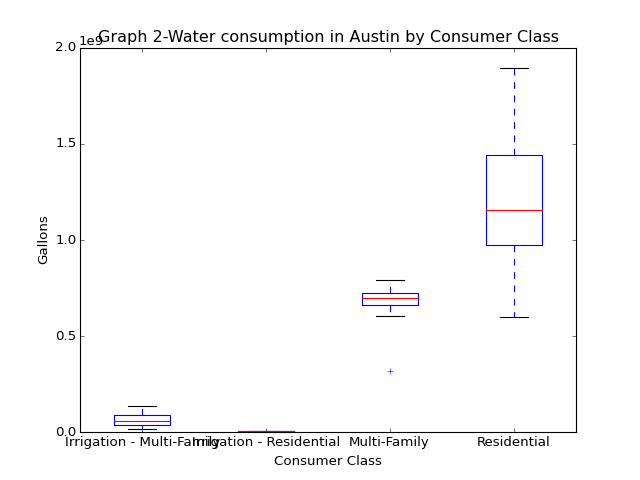

In [20]:
ax=datatmp.plot(kind="box",title="Graph 2-Water consumption in Austin by Consumer Class",sharex=True)
plt.ylabel("Gallons")
plt.xlabel("Consumer Class")
plt.show()

### Conclusion
#### From the Graph-1 We can conclude that consumption is highest in summer. The hypothesis we started with is true.
#### From Graph -2 we can conclude that residential customer class consume the most and have high variance in water consumption pattern

In [22]:
data["Postal Code"]=data["Postal Code"].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11131 entries, 2012-01-01 to 2017-10-01
Data columns (total 3 columns):
Postal Code       11131 non-null object
Customer Class    11131 non-null object
Total Gallons     11131 non-null int64
dtypes: int64(1), object(2)
memory usage: 260.9+ KB


<IPython.core.display.Javascript object>


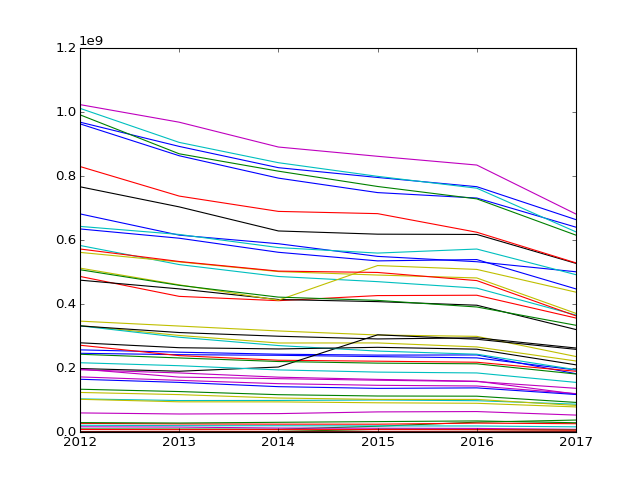

In [55]:
datatmp=data[["Postal Code","Total Gallons"]][data["Customer Class"]=="Residential"]
datatmp.index=datatmp.index.map(lambda x: datetime.strftime(x,"%Y"))
datatmp.pivot_table(index=datatmp.index,columns="Postal Code",values="Total Gallons",aggfunc=sum).plot(legend=False)
plt.show()


In [46]:
datatmp.pivot_table(index=datatmp.index,values="Total Gallons",aggfunc=sum)#.plot(legend=False)


2012    16622486300
2013    15285956000
2014    14314238500
2015    14130495500
2016    13773766400
2017    11565910200
Name: Total Gallons, dtype: int64

<IPython.core.display.Javascript object>


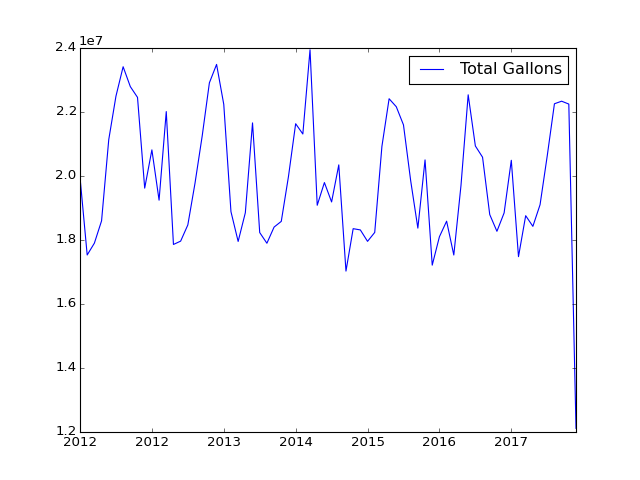

In [53]:
datatmp[].plot()
plt.show()